In [47]:
import numpy as np
import matplotlib.pyplot as plt

Num_try = 100000
Eps =0.1
Bandit_prob = [0.2,0.5,0.75]

In [48]:
class Bandit():
    def __init__(self,p): # p:winning rate- pretend not to know what these are
        self.p = p
        self.p_estimate = 0
        self.N = 0
        
    def pull(self): # return a 1 with p
        return np.random.random() < self.p # random takes [0,1] randomly
    
    def update(self, x):
        self.N +=1
        self.p_estimate = (1/self.N)*(x + self.p_estimate*(self.N-1))
        # Using the formula below
        # <p>_n*N = p_n(=x) + <p>_(n-1)*(N-1)
        
def experiment(Eps):
    bandits = [Bandit(p) for p in Bandit_prob] # we don't know what are in Bandit_prob
    
    rewards = np.zeros(Num_try)
    num_explored = 0
    num_exploited = 0
    num_opt = 0
    opt_j = np.argmax([b.p for b in bandits]) # # in bandit_prob

    
    for i in range(Num_try):
        
        # follow epsilon-greedy algorythm
        if np.random.random() < Eps:# explore
            num_explored += 1
            # j is index
            j = np.random.choice(list(range(len(bandits))))
        else: # greed
            num_exploited += 1
            j = np.argmax([k.p_estimate for k in bandits])
        
        if j == opt_j:
            num_opt += 1
            
        x = bandits[j].pull() #the chosen one can get reward or not?
        
        
        rewards[i] = x
        
        bandits[j].update(x)
        
    return bandits, rewards, num_explored, num_exploited, opt_j
        
        

In [49]:
for b in bandits:
    print("mean_estimate",b.p_estimate)
    
print("total_reward", rewards.sum())
print("overall_rate",rewards.sum() / Num_try)
print("num_exploited",num_exploited)
print("num_explored",num_explored)
print("num_opt",opt_j)


AttributeError: 'list' object has no attribute 'p_estimate'

In [54]:
Num_try = 10000
Eps = [0.5,0.4,0.2,0.05,0.01]


bandits = []
rewards = []
num_explored = []
num_exploited = []
opt_j = []


for i in range(len(Eps)):
    bandit, reward, num_explored_, num_exploited_, opt_j_ = experiment(Eps[i])
    bandits = bandits + [bandit]
    rewards =rewards + [reward]
    num_explored  = num_explored + [num_explored_]
    num_exploited = num_exploited + [num_exploited_]
    opt_j =opt_j + [opt_j_]



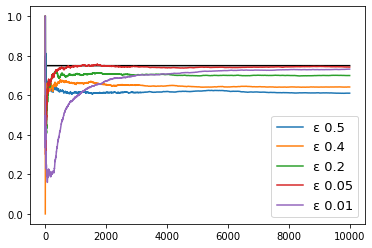

In [61]:
fig = plt.figure(1)
plt.plot(np.ones(Num_try)*np.max(Bandit_prob),c='k')
for i in range(len(Eps)):
    cum_rewards = np.cumsum(rewards[i])
    win_rates = cum_rewards / (np.arange(Num_try) + 1)
    lab = '\u03B5' +' ' + str(Eps[i])
    plt.plot(win_rates,label = lab)




plt.legend(fontsize = 13)
plt.savefig('bandit_epsilon.png')

In [58]:
'\u03B5'

'ε'